In [95]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [97]:
df = pd.read_csv('Diwali Sales Data.csv', encoding='latin1')

In [99]:
print(df.head())

   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders  \
0     Maharashtra   Western       Healthcare             Auto       1   
1  Andhra Pradesh  Southern             Govt             Auto       3   
2   Uttar Pradesh   Central       Automobile             Auto       3   
3       Karnataka  Southern     Construction             Auto       2   
4         Gujarat   Western  Food Processing             Auto       2   

    Amount  Status  unnamed1  
0  23952.0     NaN       NaN  
1  23934.0     NaN       NaN  
2  23924.0     NaN     

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB
None


In [7]:
print(df.describe())

            User_ID           Age  Marital_Status        Orders        Amount  \
count  1.125100e+04  11251.000000    11251.000000  11251.000000  11239.000000   
mean   1.003004e+06     35.421207        0.420318      2.489290   9453.610858   
std    1.716125e+03     12.754122        0.493632      1.115047   5222.355869   
min    1.000001e+06     12.000000        0.000000      1.000000    188.000000   
25%    1.001492e+06     27.000000        0.000000      1.500000   5443.000000   
50%    1.003065e+06     33.000000        0.000000      2.000000   8109.000000   
75%    1.004430e+06     43.000000        1.000000      3.000000  12675.000000   
max    1.006040e+06     92.000000        1.000000      4.000000  23952.000000   

       Status  unnamed1  
count     0.0       0.0  
mean      NaN       NaN  
std       NaN       NaN  
min       NaN       NaN  
25%       NaN       NaN  
50%       NaN       NaN  
75%       NaN       NaN  
max       NaN       NaN  


In [8]:
# Data Cleaning
df.drop(columns=['Status', 'unnamed1'], inplace=True, errors='ignore')  # Remove unwanted columns
df.dropna(inplace=True)  # Remove missing values
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')  # Ensure Amount is numeric
df.dropna(subset=['Amount'], inplace=True)

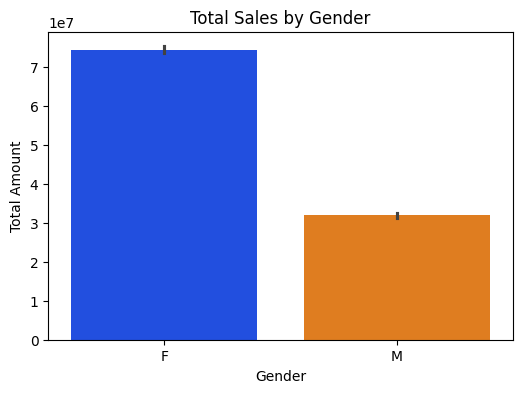

In [9]:
#  Gender-wise total sales
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Gender', y='Amount', estimator=np.sum, palette='bright')
plt.title('Total Sales by Gender')
plt.ylabel('Total Amount')
plt.show()

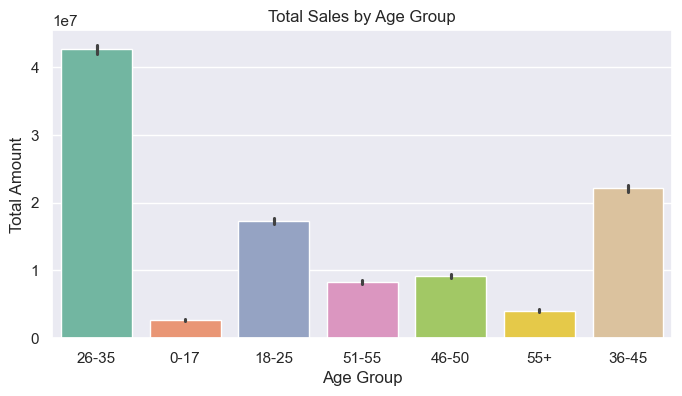

In [71]:
#  Age Group-wise total sales
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='Age Group', y='Amount', estimator=np.sum, palette='Set2')
plt.title('Total Sales by Age Group')
plt.ylabel('Total Amount')
plt.show()

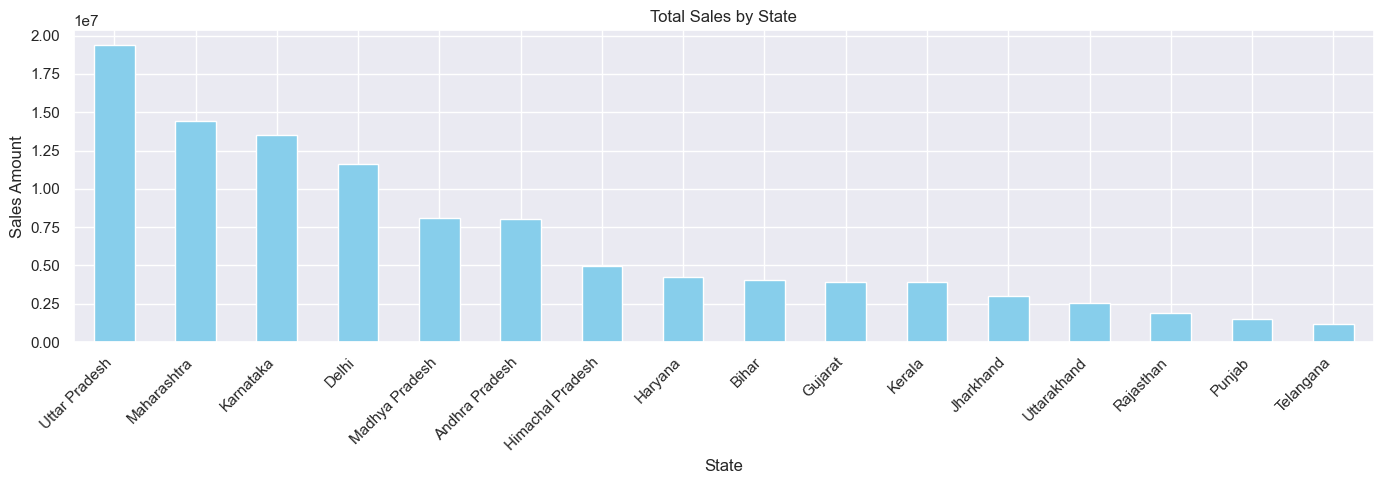

In [85]:
#  State-wise total sales
state_sales = df.groupby('State')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(14, 5))
state_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by State')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

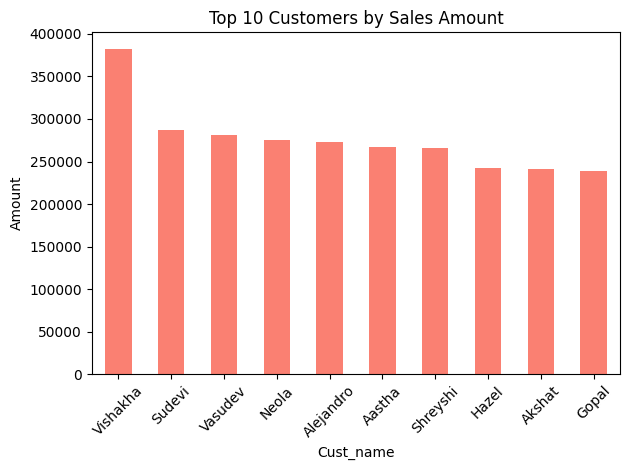

In [31]:
#  Top 10 customers by purchase amount
top_customers = df.groupby('Cust_name')['Amount'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', color='salmon')
plt.title('Top 10 Customers by Sales Amount')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

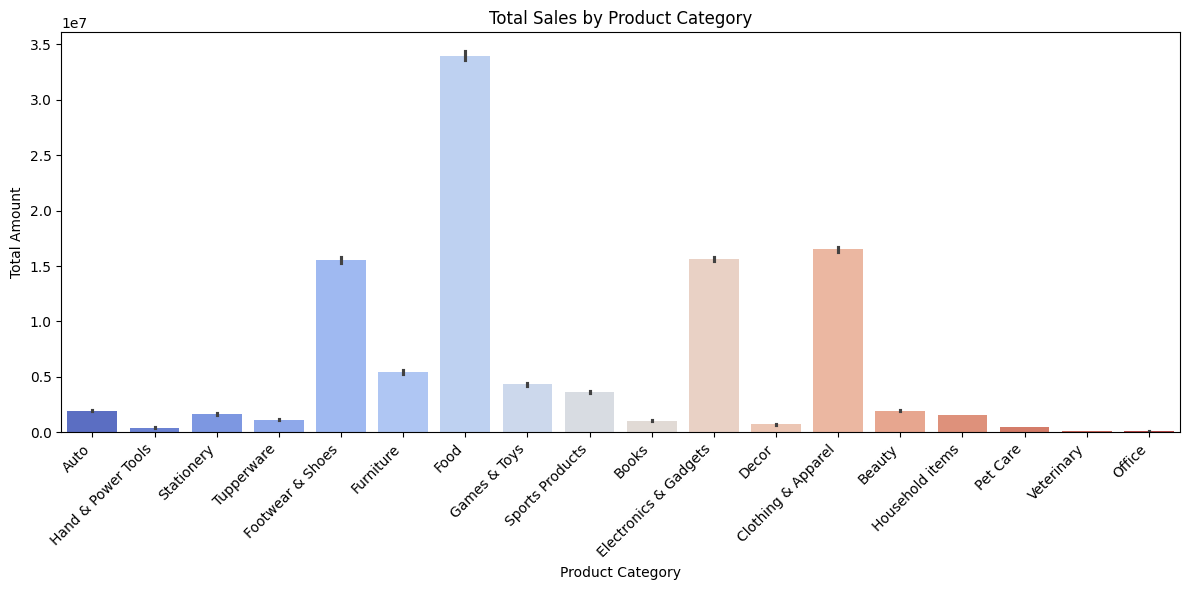

In [57]:
#total sales by product category
plt.figure(figsize=(12, 6))  # Wider and taller figure
sns.barplot(data=df, x='Product_Category', y='Amount', estimator=np.sum, palette='coolwarm')
plt.title('Total Sales by Product Category')
plt.xticks(rotation=45, ha='right')  # Rotate and align right
plt.ylabel('Total Amount')
plt.xlabel('Product Category')
plt.tight_layout()
plt.show()


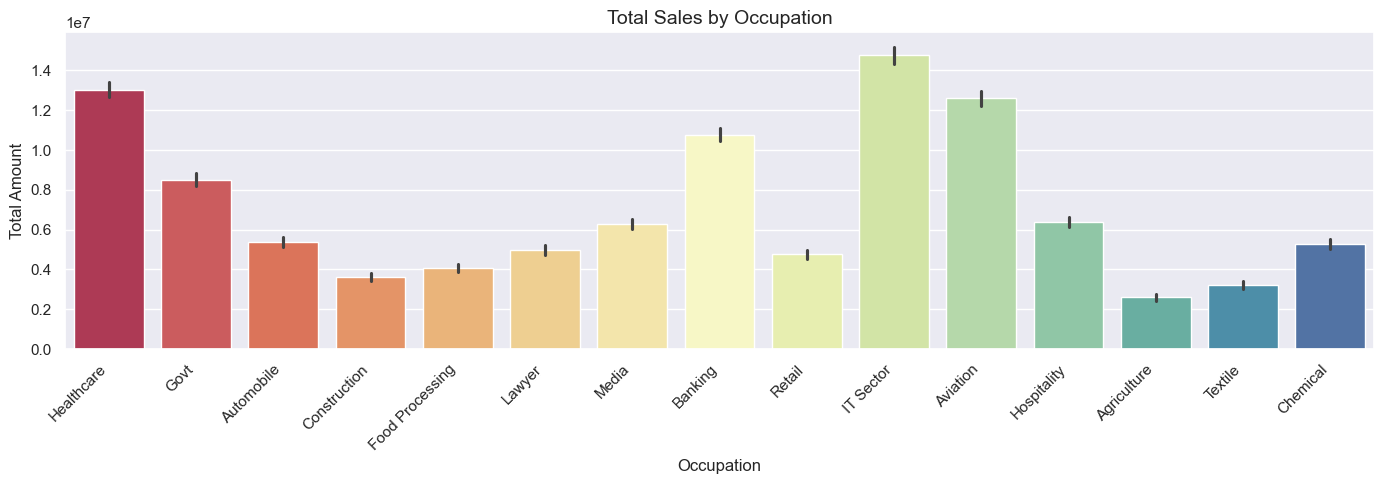

In [59]:
#total sales by occupation
plt.figure(figsize=(14, 5))  # Wider figure
sns.set(style="darkgrid")  # Set background style
sns.barplot(data=df, x='Occupation', y='Amount', estimator=np.sum, palette='Spectral')  
plt.title('Total Sales by Occupation', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Tilt x labels for better readability
plt.xlabel('Occupation')
plt.ylabel('Total Amount')
plt.tight_layout()
plt.show()


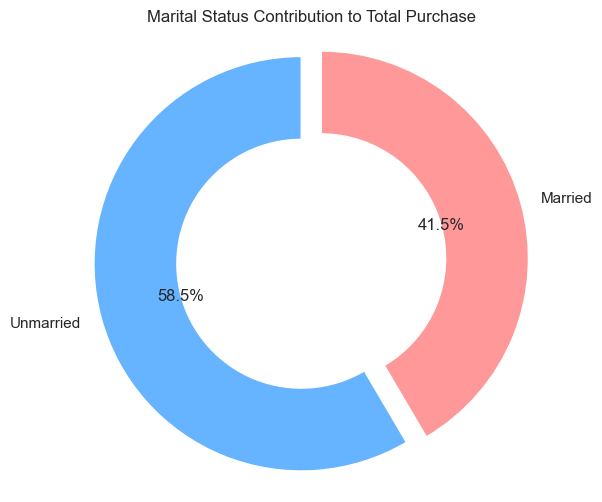

In [115]:
# Prepare data
labels = ['Unmarried', 'Married']
sizes = df.groupby('Marital_Status')['Amount'].sum().tolist()  # or use marital_purchase['Amount'] if already created
colors = ['#66b3ff', '#ff9999']
explode = (0.05, 0.05)

# Plot donut chart
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode,
    startangle=90,
    wedgeprops=dict(width=0.4)  # this makes it a donut chart
)
plt.title('Marital Status Contribution to Total Purchase')
plt.axis('equal')
plt.show()
